# Análisis de series temporales

## Importaciones y carga de datos

In [8]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import itertools
import statsmodels.api as sm
warnings.filterwarnings("ignore")
# Cargamos el dataset
data = sm.datasets.co2.load_pandas().data
print(data)

              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4
...           ...
2001-12-01  370.3
2001-12-08  370.8
2001-12-15  371.2
2001-12-22  371.3
2001-12-29  371.5

[2284 rows x 1 columns]


## Preprocesado

### Imputación de valores perdidos

In [9]:
y = data.interpolate(method='spline', order=1)

### Re-muestreo

Text(0.5, 1.0, 'Después del remuestreo')

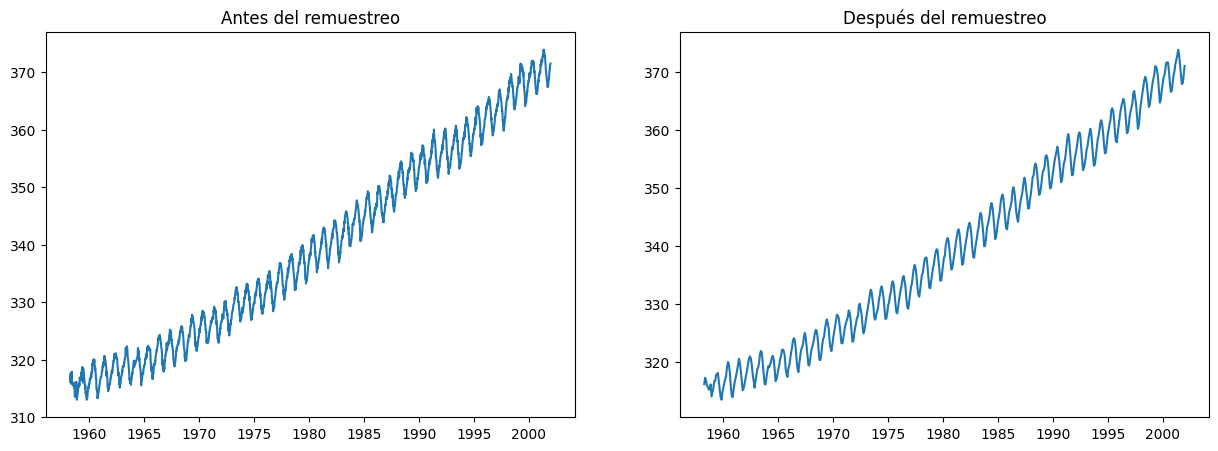

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Observamos antes del remuestreo...
ax1.plot(y)
ax1.set_title(label="Antes del remuestreo")


#... y después
y_r = y.resample('ME').mean()
ax2.plot(y_r)
ax2.set_title(label="Después del remuestreo")

### Descomposición estacional

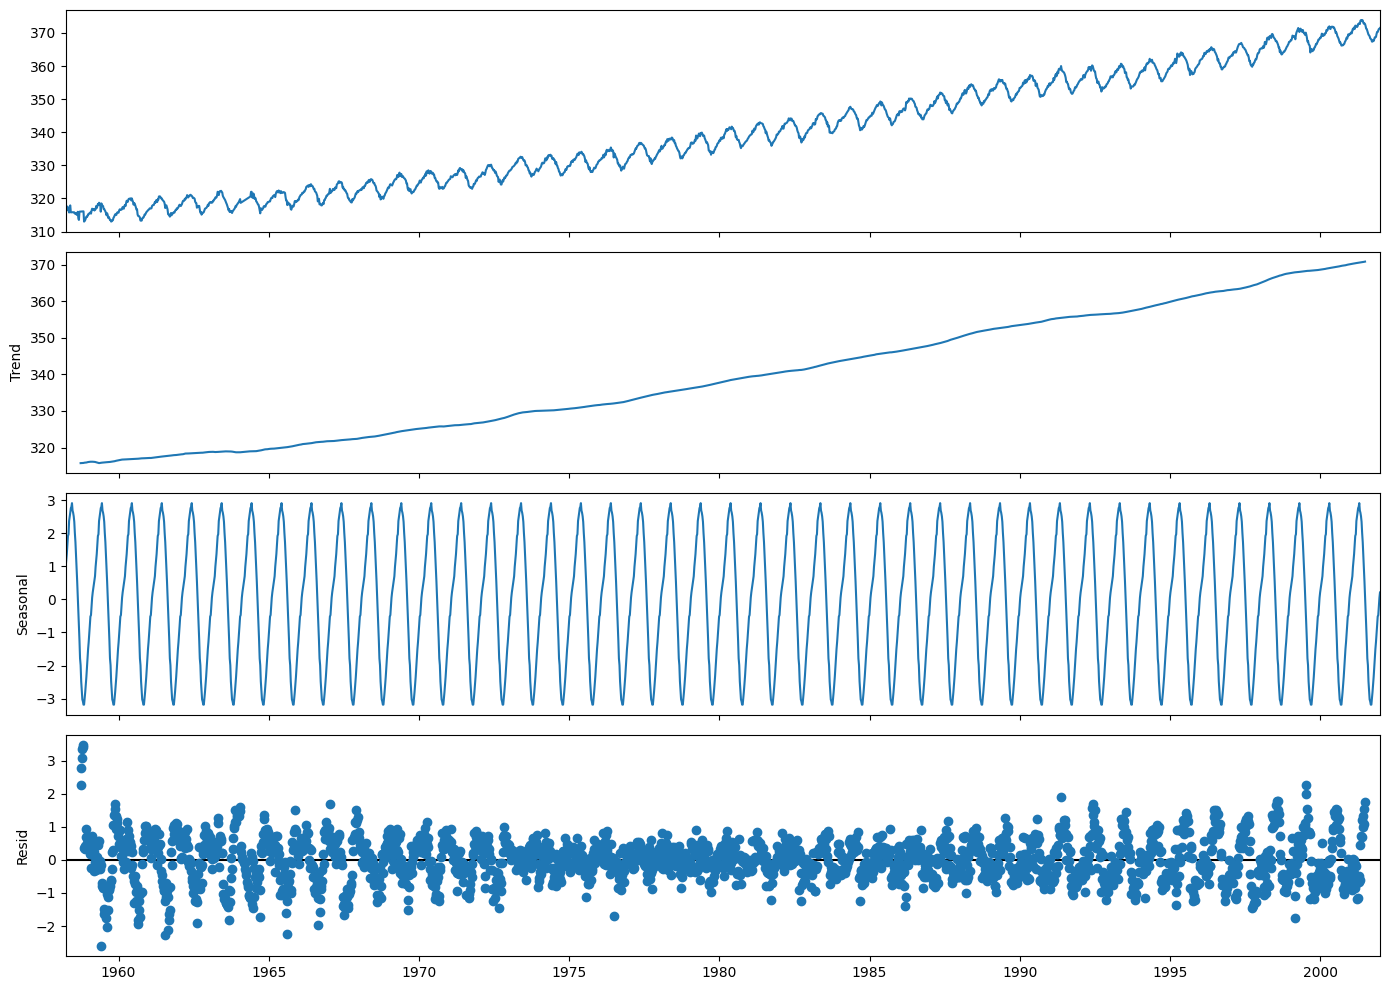

In [11]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
fig.set_size_inches(14,10)
fig.tight_layout()
plt.show()

## ARIMA

In [29]:

y_train = y[:'1991-01-29']
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]
# Ajuste de hiperparámetros
mejor = np.inf
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False,
                                            enforce_stationarity=False)
            results = mod.fit(disp=False, maxiter=200)
            if results.aic < mejor:
                mejor = results.aic
                mejores_parametros = [param, param_seasonal]
                print('Mejor ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Mejor ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:24753.485876290208
Mejor ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:22296.475473880942
Mejor ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:19969.341092858187
Mejor ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:8323.652597924152
Mejor ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:7914.884780826914
Mejor ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:7627.190555567882
Mejor ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:7330.773586254549
Mejor ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:7258.722168179253
Mejor ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:6742.716199592411
Mejor ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:5451.177111101505
Mejor ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:5163.079730391774
Mejor ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:4250.269725700403
Mejor ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:3871.022120919423
Mejor ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2564.8999820866766
Mejor ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2519.0725039329086
Mejor ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:2449.3685510614123
Mejor ARIMA(0, 1, 

                                     SARIMAX Results                                      
Dep. Variable:                                co2   No. Observations:                 1714
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 12)   Log Likelihood               -1066.333
Date:                            Thu, 18 Dec 2025   AIC                           2150.667
Time:                                    15:00:47   BIC                           2199.538
Sample:                                03-29-1958   HQIC                          2168.767
                                     - 01-26-1991                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5602      0.036     42.769      0.000       1.489       1.632
ar.L2         -0.6328      0.036   

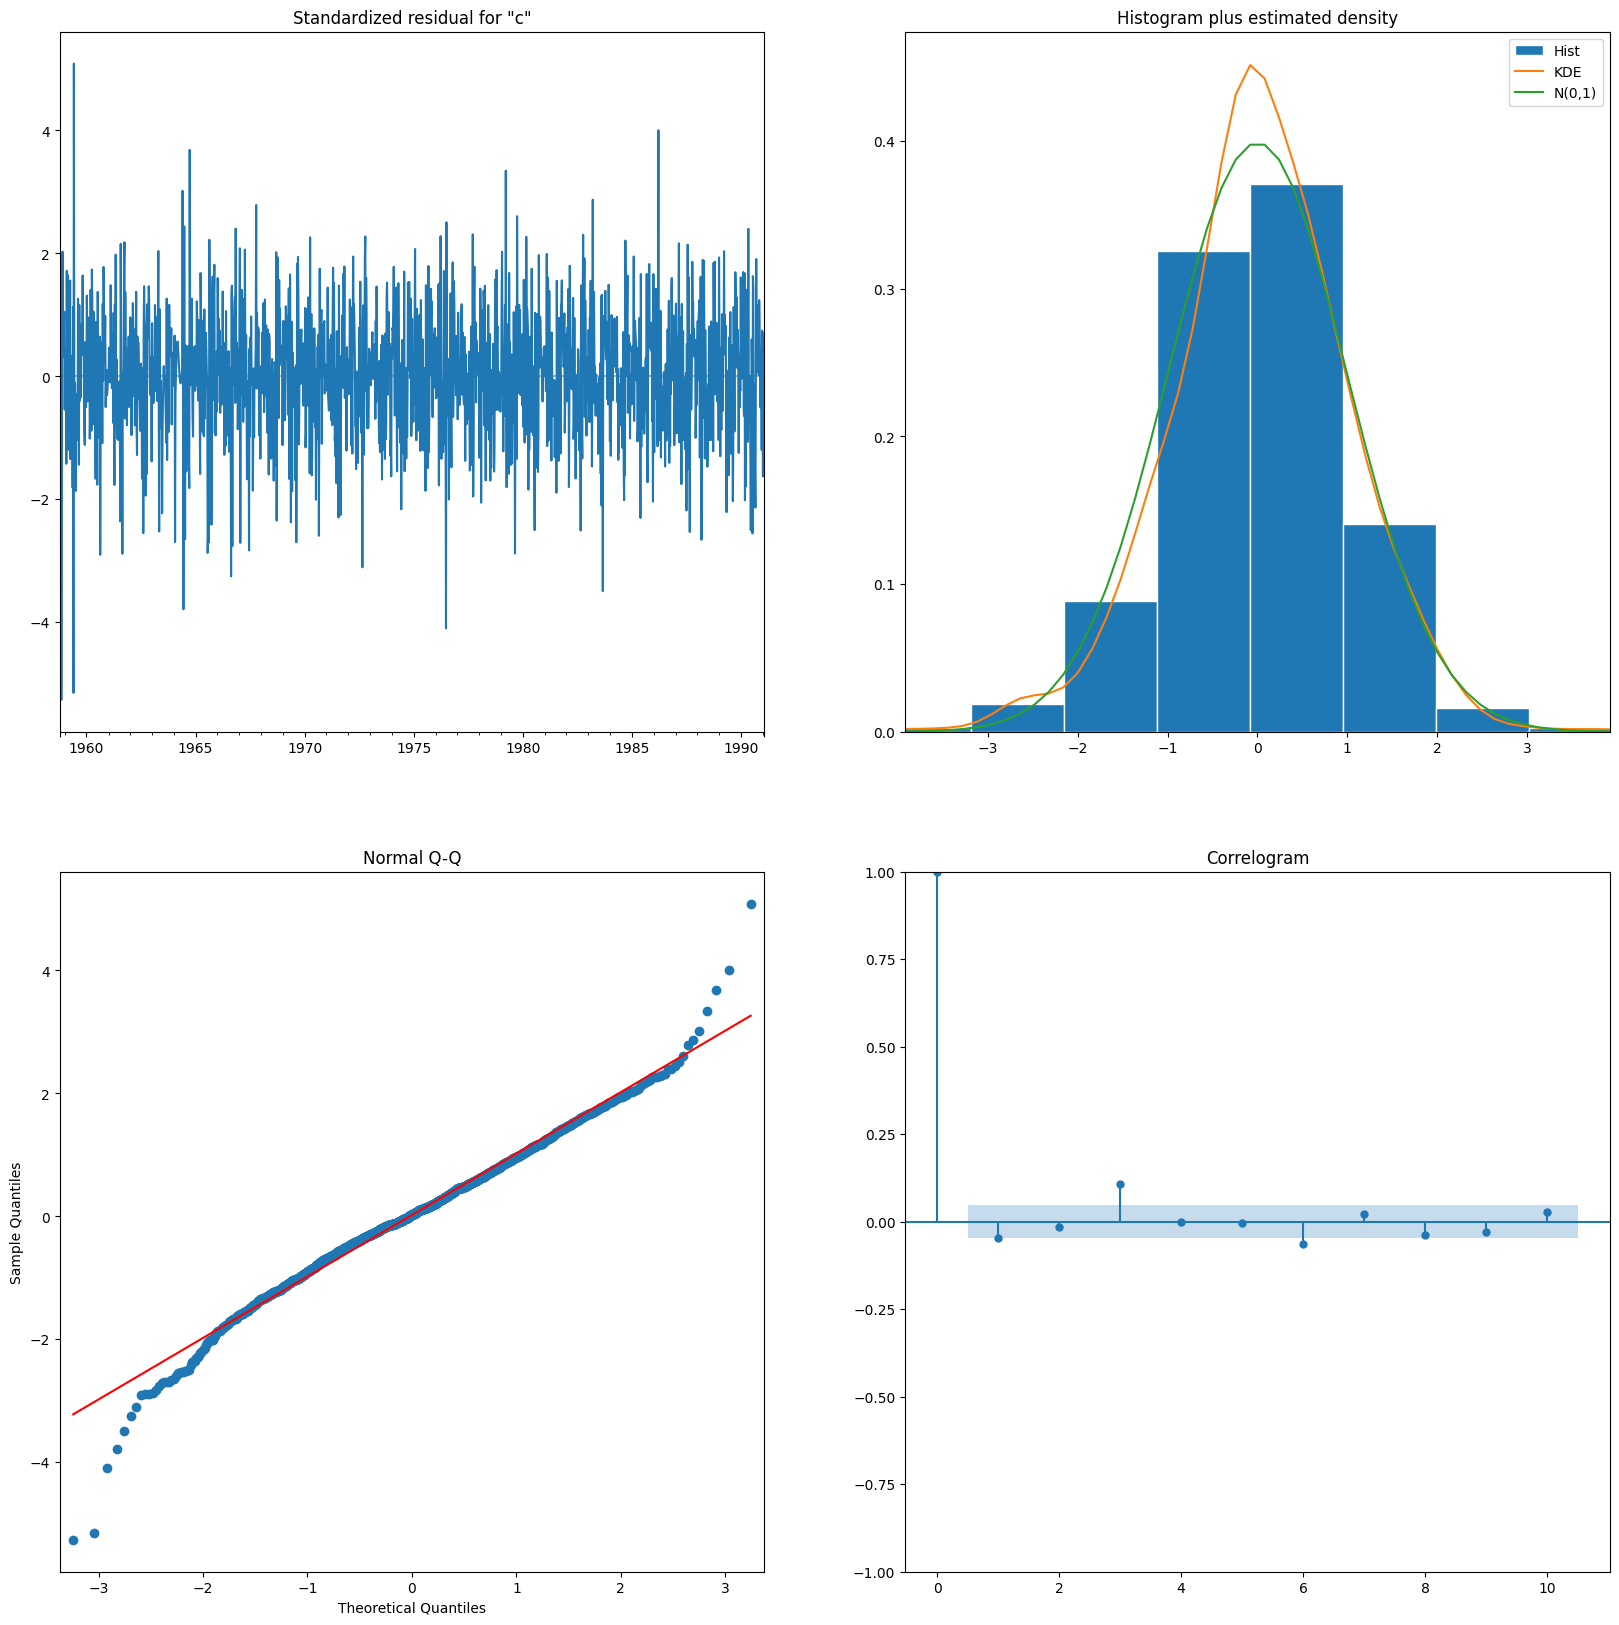

In [30]:
# Ajuste del modelo
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=mejores_parametros[0],
                                seasonal_order=mejores_parametros[1],
                                enforce_invertibility=False,
								enforce_stationarity=False)
results = mod.fit(maxiter=200)
print(results.summary().tables[0])
print(results.summary().tables[1])
print(results.summary().tables[2])
results.plot_diagnostics(figsize=(20, 20))
plt.show()